In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
housing_df = pd.read_csv(r'C:\Users\Ashish\Desktop\machine learning\HousingData.csv')

In [3]:
housing_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [116]:
housing_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
housing_df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
housing_df.fillna(housing_df.mean(), inplace=True)

In [7]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [20]:
X_features = list(housing_df.columns)
X_features.remove('MEDV')
X_features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [24]:
X = sm.add_constant(housing_df[X_features])
Y = housing_df.MEDV

In [26]:
train_X, test_X,  train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state= 42)

In [28]:
housing_model = sm.OLS(train_Y, train_X).fit()
housing_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.722    
Dependent Variable: MEDV             AIC:                2150.5927
Date:               2025-01-31 10:34 BIC:                2204.7629
No. Observations:   354              Log-Likelihood:     -1061.3  
Df Model:           13               F-statistic:        71.56    
Df Residuals:       340              Prob (F-statistic): 6.39e-89 
R-squared:          0.732            Scale:              24.496   
-------------------------------------------------------------------
              Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
-------------------------------------------------------------------
const         28.9196    6.1470   4.7047  0.0000   16.8287  41.0106
CRIM          -0.1288    0.0412  -3.1265  0.0019   -0.2098  -0.0478
ZN             0.0319    0.0178   1.7889  0.0745   -0.0032   0.0670
INDUS         -0.0108    0.0726  -0.1487  0.8819   -0.1537   0.1321
CHAS           3.6892    1.0767   3.4265  0.0007    1.5714   5.8070
NOX          -13.9639    4.7453  -2.9427  0.0035  -23.2977  -4.6301
RM             4.4185    0.4952   8.9227  0.0000    3.4445   5.3925
AGE           -0.0261    0.0162  -1.6117  0.1080   -0.0580   0.0058
DIS           -1.4328    0.2461  -5.8225  0.0000   -1.9168  -0.9487
RAD            0.1969    0.0833   2.3645  0.0186    0.0331   0.3607
TAX           -0.0072    0.0047  -1.5422  0.1240   -0.0164   0.0020
PTRATIO       -0.8863    0.1573  -5.6333  0.0000   -1.1957  -0.5768
B              0.0118    0.0034   3.4410  0.0007    0.0050   0.0185
LSTAT         -0.4731    0.0592  -7.9983  0.0000   -0.5895  -0.3568
------------------------------------------------------------------
Omnibus:             120.950       Durbin-Watson:          2.094  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       515.350
Skew:                1.420         Prob(JB):               0.000  
Kurtosis:            8.184         Condition No.:          14710  
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(X):
    X_matrix = X.to_numpy()
    vif = [variance_inflation_factor(X_matrix, i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [32]:
vif_factors = get_vif_factors(X[X_features])
vif_factors

,column,VIF
0,CRIM,2.021270
1,ZN,2.690726
2,INDUS,13.582348
3,CHAS,1.149619
4,NOX,70.613690
5,RM,75.301103
6,AGE,19.805308
7,DIS,13.833517
8,RAD,15.094122
9,TAX,60.597824


In [70]:
columns_with_large_vif = vif_factors[vif_factors.VIF >10].column

In [72]:
print(list(columns_with_large_vif))

['INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


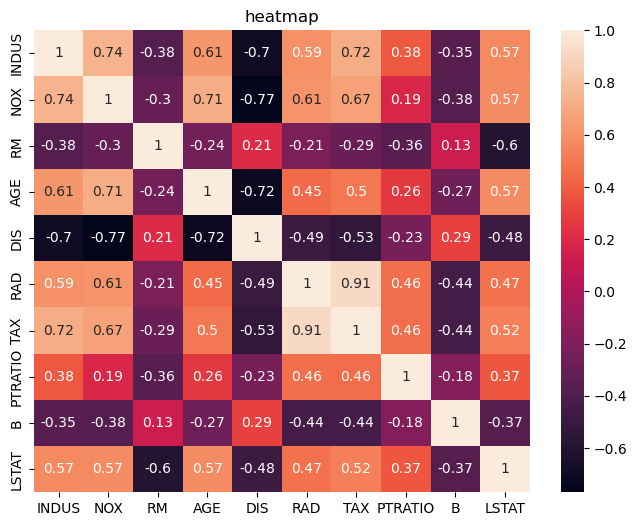

In [74]:
plt.figure(figsize = (8,6))
sns.heatmap(X[columns_with_large_vif].corr(), annot = True)
plt.title("heatmap")
plt.show()

In [76]:
columns_to_be_removed = ['INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [78]:
X_new_feature = list(set(X_features) - set(columns_to_be_removed))

In [84]:
get_vif_factors(X[X_new_feature])

,column,VIF
0,ZN,1.007898
1,CRIM,1.003682
2,CHAS,1.010975


In [94]:
train_X = train_X[X_new_feature]

In [92]:
from sklearn.linear_model import LinearRegression

In [96]:
linreg = LinearRegression()
linreg.fit(train_X, train_Y)

LinearRegression()

In [98]:
linreg.intercept_

22.255862805523815

In [100]:
linreg.coef_

array([ 0.1176956 , -0.34801392,  8.52721185])

In [108]:
test_X = test_X[X_new_feature]
pred_y = linreg.predict(test_X)

In [114]:
test_pred_df = pd.DataFrame({'actual' : 'test_Y', 'predicted': np.round(pred_y,2), 'residual' : test_Y- pred_y})
test_pred_df.sample(3)

,actual,predicted,residual
39,test_Y,31.07,-0.273417
417,test_Y,13.23,-2.828173
335,test_Y,22.24,-1.142078
